# CineVision Studios
## Análisis Exploratorio

Fabiola Contreras, 22787
María José Villafuerte, 22129

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm
import seaborn as sns
from collections import Counter

Lectura de datos de CSV

In [2]:
datos=pd.read_csv("movies.csv", encoding="latin1")

## Análisis de variables

In [3]:
# Variables cuantitativas
columnas_cuantitativas = datos.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Variables cualitativas
columnas_cualitativas = datos.select_dtypes(include=['object', 'category']).columns.tolist()

### Tablas de frecuencia

In [13]:
print(f"\nFrecuencias para {columnas_cualitativas[0]}:")

datos['split'] = datos['genres'].str.split('|')
datos_exploded = datos.explode('split')
tabla_frecuencia = datos_exploded['split'].value_counts()

# Mostrar la tabla de frecuencias
print(tabla_frecuencia)


Frecuencias para genres:
split
Drama              3789
Comedy             3018
Action             2632
Thriller           2565
Adventure          1769
Horror             1512
Animation          1460
Romance            1428
Family             1407
Fantasy            1284
Science Fiction    1267
Crime              1225
Mystery             804
History             406
Music               315
Documentary         299
TV Movie            276
War                 275
Western             120
Name: count, dtype: int64


In [69]:
print(f"\nFrecuencias para {columnas_cualitativas[1]}:")
print(datos[columnas_cualitativas[1]].value_counts())


Frecuencias para homePage:
homePage
http://www.naruto-movie.com/                                                                          6
http://www.thehungergames.movie/                                                                      4
http://www.kungfupanda.com/                                                                           3
http://wwws.warnerbros.co.jp/rurouni-kenshin/index.html                                               3
http://www.p3m.jp/                                                                                    3
                                                                                                     ..
https://www.netflix.com/title/81332722                                                                1
https://www.paramountplus.com/movies/reno-911-the-hunt-for-qanon/4lSjY6_RqRGLtpUqpgUKWtH2EFZKcmZf/    1
https://www.netflix.com/title/81478916                                                                1
https://www.netflix.com/tit

In [12]:
print(f"\nFrecuencias para {columnas_cualitativas[2]}:")
datos['split'] = datos['productionCompany'].str.split('|')
datos_exploded = datos.explode('split')
tabla_frecuencia = datos_exploded['split'].value_counts()

# Mostrar la tabla de frecuencias
print(tabla_frecuencia)


Frecuencias para productionCompany:
split
Warner Bros. Pictures                        480
Universal Pictures                           466
Columbia Pictures                            347
Paramount                                    320
20th Century Fox                             310
                                            ... 
King World Entertainment                       1
Jerry Gershwin Productions                     1
Íslenska kvikmyndasamsteypan                   1
Elliott Kastner Productions                    1
He Nan Dian Ying Dian Shi Zhi Zuo Ji Tuan      1
Name: count, Length: 10142, dtype: int64


In [11]:
print(f"\nFrecuencias para {columnas_cualitativas[3]}:")

datos['split'] = datos['productionCompanyCountry'].str.strip().str.split('|')
datos_exploded = datos.explode('split')
tabla_frecuencia = datos_exploded['split'].value_counts()

# Mostrar la tabla de frecuencias
print(tabla_frecuencia)


Frecuencias para productionCompanyCountry:
split
US           12675
              7735
JP            1604
FR            1478
GB            1413
             ...  
Indonesia        1
EG               1
MC               1
KH               1
BO               1
Name: count, Length: 86, dtype: int64


In [8]:
print(f"\nFrecuencias para {columnas_cualitativas[4]}:")

datos['split'] = datos['productionCountry'].str.split('|')
datos_exploded = datos.explode('split')
tabla_frecuencia = datos_exploded['split'].value_counts()

# Mostrar la tabla de frecuencias
print(tabla_frecuencia)


Frecuencias para productionCountry:
split
United States of America    6788
United Kingdom              1171
Japan                        731
France                       668
Canada                       634
                            ... 
Bosnia and Herzegovina         1
Costa Rica                     1
Estonia                        1
Antarctica                     1
Kenya                          1
Name: count, Length: 111, dtype: int64


In [73]:
print(f"\nFrecuencias para {columnas_cualitativas[5]}:")
print(datos[columnas_cualitativas[5]].value_counts())


Frecuencias para video:
video
False    9430
True       84
Name: count, dtype: int64


In [74]:
print(f"\nFrecuencias para {columnas_cualitativas[6]}:")
print(datos[columnas_cualitativas[6]].value_counts())


Frecuencias para director:
director
Steven Spielberg              29
Clint Eastwood                28
Ridley Scott                  23
Martin Scorsese               19
Steven Soderbergh             19
                              ..
Fernando Ayllón                1
Gray Hofmeyr|Ziggy Hofmeyr     1
Izu Ojukwu                     1
Rodrigo Van Der Put            1
Ale McHaddo                    1
Name: count, Length: 5330, dtype: int64


In [9]:
print(f"\nFrecuencias para {columnas_cualitativas[7]}:")
datos['split'] = datos['actors'].str.split('|')
datos_exploded = datos.explode('split')
tabla_frecuencia = datos_exploded['split'].value_counts()

# Mostrar la tabla de frecuencias
print(tabla_frecuencia)


Frecuencias para actors:
split
FALSE              480
Frank Welker       143
Grey DeLisle        97
Jeff Bennett        91
Fred Tatasciore     86
                  ... 
Mariana Gajá         1
César Rodríguez      1
Christian Ramos      1
47.619               1
18.866               1
Name: count, Length: 132626, dtype: int64


In [10]:
print(f"\nFrecuencias para {columnas_cualitativas[9]}:")
datos['split'] = datos['actorsCharacter'].str.split('|')
datos_exploded = datos.explode('split')
tabla_frecuencia = datos_exploded['split'].value_counts()

# Mostrar la tabla de frecuencias
print(tabla_frecuencia)


Frecuencias para actorsCharacter:
split
                             4474
Self                         1723
Additional Voices (voice)    1566
Himself                      1445
Dancer                       1008
                             ... 
Uncle Owen                      1
Aunt Beru                       1
Chief Jawa                      1
Pawnee #1                       1
Chaiyut's Girlfriend            1
Name: count, Length: 164023, dtype: int64


In [78]:
print(f"\nFrecuencias para {columnas_cualitativas[10]}:")
print(datos[columnas_cualitativas[10]].value_counts())


Frecuencias para originalTitle:
originalTitle
Pinocchio                                    4
Cinderella                                   3
Les Misérables                               3
Carrie                                       3
Prey                                         3
                                            ..
Camp Confidential: America's Secret Nazis    1
Les Rois de l'arnaque                        1
Beni Çok Sev                                 1
Puff: Wonders of the Reef                    1
14 Peaks: Nothing Is Impossible              1
Name: count, Length: 9760, dtype: int64


In [79]:
print(f"\nFrecuencias para {columnas_cualitativas[11]}:")
print(datos[columnas_cualitativas[11]].value_counts())


Frecuencias para title:
title
Pinocchio                                       4
Cinderella                                      4
Halloween                                       3
Fallen                                          3
Godzilla                                        3
                                               ..
Lords of Scam                                   1
Love Me Instead                                 1
Puff: Wonders of the Reef                       1
14 Peaks: Nothing Is Impossible                 1
Catalina la Catrina: especial Día de Muertos    1
Name: count, Length: 9697, dtype: int64


In [80]:
print(f"\nFrecuencias para {columnas_cualitativas[12]}:")
print(datos[columnas_cualitativas[12]].value_counts())


Frecuencias para originalLanguage:
originalLanguage
en    7772
ja     644
es     425
fr     271
ko     167
zh     119
it     100
de      84
cn      80
ru      67
pt      43
no      28
sv      27
hi      27
da      27
nl      18
th      17
pl      15
id      12
tr      10
fi       8
tl       5
te       5
sr       4
is       4
fa       3
cs       2
el       2
ro       2
uk       2
nb       1
bn       1
he       1
eu       1
ms       1
ar       1
la       1
ta       1
ml       1
ca       1
Name: count, dtype: int64


In [81]:
print(f"\nFrecuencias para {columnas_cualitativas[13]}:")
print(datos[columnas_cualitativas[13]].value_counts())


Frecuencias para releaseDate:
releaseDate
2021-02-12    15
2021-10-08    15
2021-10-01    14
2021-11-12    12
2019-11-08    11
              ..
1985-02-20     1
2004-12-15     1
2000-09-28     1
1996-12-12     1
2021-08-30     1
Name: count, Length: 5568, dtype: int64


In [82]:
print(f"\nFrecuencias para {columnas_cualitativas[14]}:")
print(datos[columnas_cualitativas[14]].value_counts())


Frecuencias para castWomenAmount:
castWomenAmount
3                                                               1055
4                                                               1038
5                                                                893
2                                                                873
6                                                                776
                                                                ... 
897243                                                             1
899599                                                             1
917263                                                             1
Phantastische Harry Potter Momente - Das große SAT.1 Spezial       1
922162                                                             1
Name: count, Length: 222, dtype: int64


In [83]:
print(f"\nFrecuencias para {columnas_cualitativas[15]}:")
print(datos[columnas_cualitativas[15]].value_counts())


Frecuencias para castMenAmount:
castMenAmount
7                                                               546
10                                                              501
8                                                               493
9                                                               492
5                                                               477
                                                               ... 
912223                                                            1
Making The Witcher: Season 2                                      1
Phantastische Harry Potter Momente - Das große SAT.1 Spezial      1
922017                                                            1
Five Nights at Freddy's: Home Breach                              1
Name: count, Length: 612, dtype: int64


## Preguntas Clave

1.	¿Cuáles son las 10 películas que contaron con más presupuesto?
2.	¿Cuáles son las 10 películas que más ingresos tuvieron?
3.	¿Cuál es la película que más votos tuvo?
4.	¿Cuál es la peor película de acuerdo con los votos de todos los usuarios?
5.	¿Cuántas películas se hicieron en cada año? ¿En qué año se hicieron más películas? Haga un gráfico de barras
6.	¿Cuál es el género principal de las 20 películas más recientes? ¿Cuál es el género principal que predomina en el conjunto de datos? Represéntelo usando un gráfico.
        a. ¿A qué género principal pertenecen las películas más largas?
7.	¿Las películas de qué genero principal obtuvieron mayores ganancias?
8.	¿La cantidad de actores influye en los ingresos de las películas? ¿se han hecho películas con más actores en los últimos años?
9.	¿Es posible que la cantidad de hombres y mujeres en el reparto influya en la popularidad y los ingresos de las películas?
10.	¿Quiénes son los directores que hicieron las 20 películas mejor calificadas?
11.	¿Cómo se correlacionan los presupuestos con los ingresos? ¿Los altos presupuestos
significan altos ingresos? Haga los gráficos que necesite, histograma, diagrama de
dispersión
12.	¿Se asocian ciertos meses de lanzamiento con mejores ingresos?
13.	¿En qué meses se han visto los lanzamientos con mejores ingresos? ¿cuántas películas, en promedio, se han lanzado por mes?
14.	¿Cómo se correlacionan las calificaciones con el éxito comercial?
15.	¿La popularidad del elenco está directamente correlacionada con el éxito de taquilla?
16.	¿Qué estrategias de marketing, como videos promocionales o páginas oficiales, generan mejores resultados?

In [84]:
print("2. ¿Cuáles son las 10 películas que más ingresos tuvieron?")
top_10_ingresos = datos[['title', 'revenue']].sort_values(by='revenue', ascending=False).head(10)
print(top_10_ingresos)


2. ¿Cuáles son las 10 películas que más ingresos tuvieron?
                             title       revenue
3210                        Avatar  2.847246e+09
5952             Avengers: Endgame  2.797801e+09
307                        Titanic  2.187464e+09
4947  Star Wars: The Force Awakens  2.068224e+09
5953        Avengers: Infinity War  2.046240e+09
4914                Jurassic World  1.671713e+09
7134                 The Lion King  1.667635e+09
9049       Spider-Man: No Way Home  1.631853e+09
3397                  The Avengers  1.518816e+09
5087                     Furious 7  1.515048e+09


In [92]:
print("4. ¿Cuál es la peor película de acuerdo con los votos de todos los usuarios?")
bottom_10_votes = datos[['title', 'voteAvg']].sort_values(by='voteAvg', ascending=True).head(1)
print(bottom_10_votes)

4. ¿Cuál es la peor película de acuerdo con los votos de todos los usuarios?
                                                  title  voteAvg
9786  DAKAICHI -I'm Being Harassed by the Sexiest Ma...      1.3


6. ¿Cuál es el género principal de las 20 películas más recientes?
                                  genres releaseDate
9516                               Drama  2022-01-21
9545                        Comedy|Drama  2022-01-19
9197                       Drama|Mystery  2022-01-14
9808                            Thriller  2022-01-07
9586         Action|Thriller|Crime|Drama  2022-01-07
9982                         Documentary  2022-01-01
9951                        Action|Drama  2022-01-01
9257                                 NaN  2021-12-31
9241                                 NaN  2021-12-31
9866                             Romance  2021-12-31
9683  Animation|Adventure|Fantasy|Family  2021-12-30
9877             Horror|Thriller|Mystery  2021-12-28
9988                              Comedy  2021-12-27
9346              Comedy|Romance|Fantasy  2021-12-26
9253                               Drama  2021-12-25
9996                              Comedy  2021-12-25
9479                       Comed

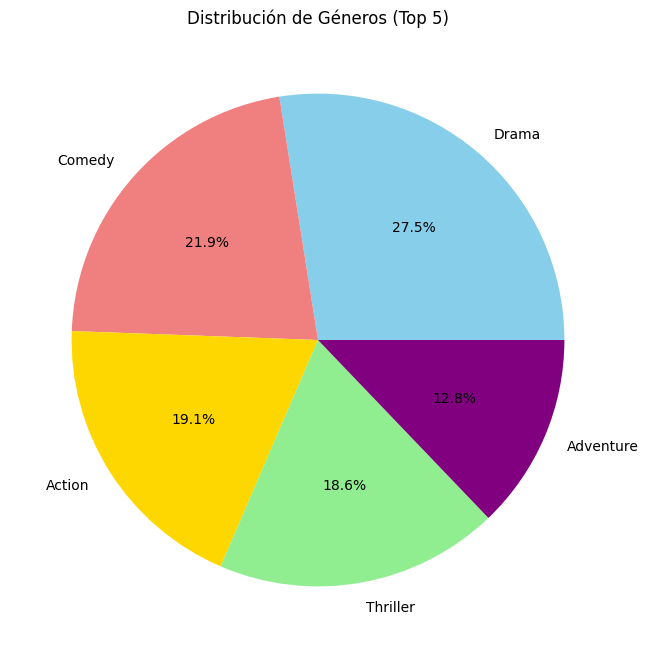



¿A qué género principal pertenecen las películas más largas?
                     genres  runtime
9347            Documentary      750
5358            Documentary      400
3885      Drama|History|War      333
962           Drama|History      317
1263  Drama|History|Romance      248


In [100]:
# Asegurar que las fechas sean de tipo datetime
datos['releaseDate'] = pd.to_datetime(datos['releaseDate'], errors='coerce')

print("6. ¿Cuál es el género principal de las 20 películas más recientes?")
top_20_recent = datos[['genres', 'releaseDate']].sort_values(by='releaseDate', ascending=False).head(20)
print(top_20_recent)

# Separar géneros y contar frecuencia
todos_los_generos = datos['genres'].dropna().str.split('|').sum()
conteo_generos = pd.Series(Counter(todos_los_generos)).sort_values(ascending=False)

# Graficar distribución de géneros

plt.figure(figsize=(8, 8))
conteo_generos.head(5).plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'gold', 'lightgreen', 'purple'])
plt.title('Distribución de Géneros (Top 5)')
plt.ylabel('')
plt.show()

print("\n\n¿A qué género principal pertenecen las películas más largas?")
top_5_long = datos[['genres', 'runtime']].sort_values(by='runtime', ascending=False).head(5)
print(top_5_long)


8. ¿La cantidad de actores influye en los ingresos de las películas?


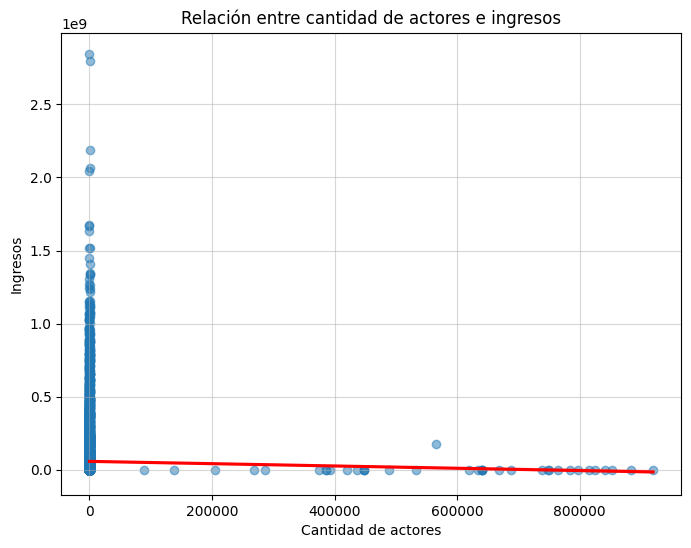

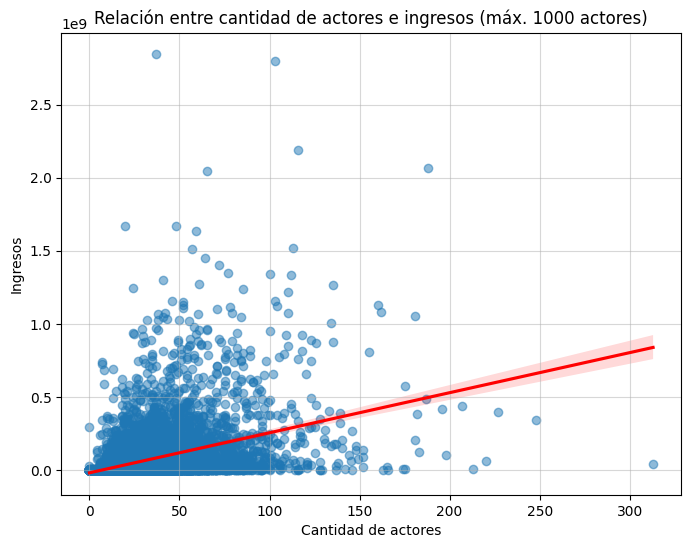

La correlación entre la cantidad de actores y los ingresos es: -0.019554880174247613

¿se han hecho películas con más actores en los últimos años?
año
1998      36.706522
1999      34.051546
2000      31.477273
2001      33.147727
2002    2668.783784
2003      28.281407
2004    3032.510917
2005      28.416327
2006    8338.610294
2007      29.770677
2008    2853.248227
2009    3105.020468
2010     314.814332
2011    1269.110803
2012    2442.167683
2013    1870.553398
2014    2193.423611
2015    1403.093333
2016    4111.929982
2017    3593.011327
2018    3896.748808
2019    2107.874183
2020    2832.315197
2021    3188.525735
2022      12.142857
Name: actorsAmount, dtype: float64


In [132]:
print("8. ¿La cantidad de actores influye en los ingresos de las películas?")
plt.figure(figsize=(8, 6))
sns.regplot(x=datos['actorsAmount'], y=datos['revenue'], scatter_kws={'alpha': 0.5}, line_kws={"color": "red"})
plt.title('Relación entre cantidad de actores e ingresos')
plt.xlabel('Cantidad de actores')
plt.ylabel('Ingresos')
plt.grid(alpha=0.5)
plt.show()

# Filtrar los datos para actores <= 1000
datos_filtrados = datos[datos['actorsAmount'] <= 1000]

# 📏 Scatter plot con línea de regresión
plt.figure(figsize=(8, 6))
sns.regplot(x=datos_filtrados['actorsAmount'], 
            y=datos_filtrados['revenue'], 
            scatter_kws={'alpha': 0.5}, 
            line_kws={"color": "red"})
plt.title('Relación entre cantidad de actores e ingresos (máx. 1000 actores)')
plt.xlabel('Cantidad de actores')
plt.ylabel('Ingresos')
plt.grid(alpha=0.5)
plt.show()

# Calcular la correlación entre las calificaciones (actorsAmount) y los ingresos (revenue)
correlacion = datos['actorsAmount'].corr(datos['revenue'])

print(f"La correlación entre la cantidad de actores y los ingresos es: {correlacion}")

print("\n¿se han hecho películas con más actores en los últimos años?")
# Convertir releaseDate a tipo datetime (si no lo está)
datos['releaseDate'] = pd.to_datetime(datos['releaseDate'], errors='coerce')

# Extraer el año y agrupar
datos['año'] = datos['releaseDate'].dt.year

df_ultimos_20_años = datos[datos['año'] >= (datos['año'].max() - 24)] 
actors_por_año = df_ultimos_20_años.groupby('año')['actorsAmount'].mean()


# Mostrar los resultados
print(actors_por_año)

In [106]:
print("10. ¿Quiénes son los directores que hicieron las 20 películas mejor calificadas?")

top_20_directors = (
    datos[['director', 'voteAvg']]
    .dropna()  # Elimina filas con NaN en 'director' o 'voteAvg'
    .sort_values(by='voteAvg', ascending=False)
    .head(20)
)

print(top_20_directors)

10. ¿Quiénes son los directores que hicieron las 20 películas mejor calificadas?
                                               director  voteAvg
9298                                  Laurent Bouzereau     10.0
8632                                       Thomas Coven     10.0
9246                                      Rebecca Sugar     10.0
9733                                     Christin Baker     10.0
9084                         Víctor Barba|Juan Olivares     10.0
9990                                Miguel Angel Zavala     10.0
9347                                       Kaku Arakawa     10.0
6885             Dave Bullock|Troy Adomitis|Victor Cook      9.6
9368                                     Won Myeong-jun      9.5
6170                                       Samuel Leong      9.5
5528                                 Selena Quintanilla      9.4
9783                                     Haruo Sotozaki      9.3
9756                                     Haruo Sotozaki      9.3
9451     

12. ¿Se asocian ciertos meses de lanzamiento con mejores ingresos?


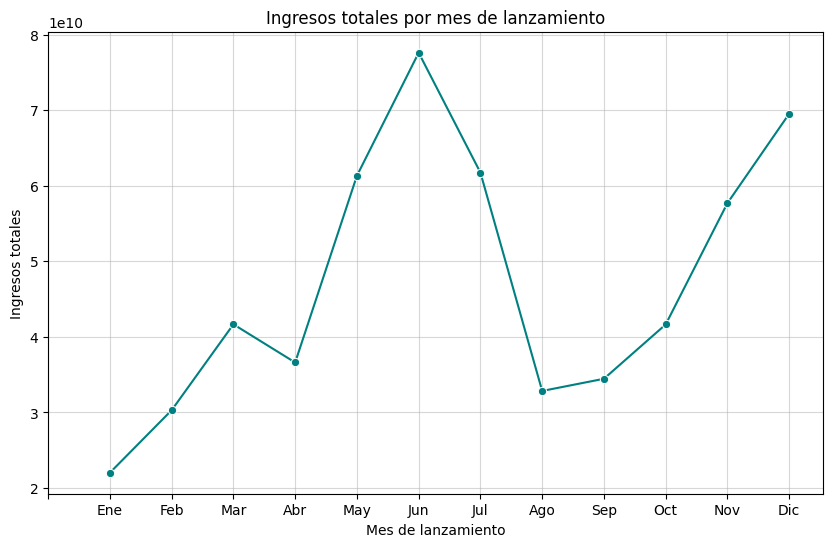

In [116]:
print("12. ¿Se asocian ciertos meses de lanzamiento con mejores ingresos?")

plt.figure(figsize=(10, 6))
ingresos_por_mes = datos.groupby('releaseMonth')['revenue'].sum()
sns.lineplot(x=ingresos_por_mes.index, y=ingresos_por_mes.values, marker='o', color='teal')

# Personalización
plt.title('Ingresos totales por mes de lanzamiento')
plt.xlabel('Mes de lanzamiento')
plt.ylabel('Ingresos totales')
plt.xticks(range(13), ['', 'Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.grid(alpha=0.5)
plt.show()

14. ¿Cómo se correlacionan las calificaciones con el éxito comercial?


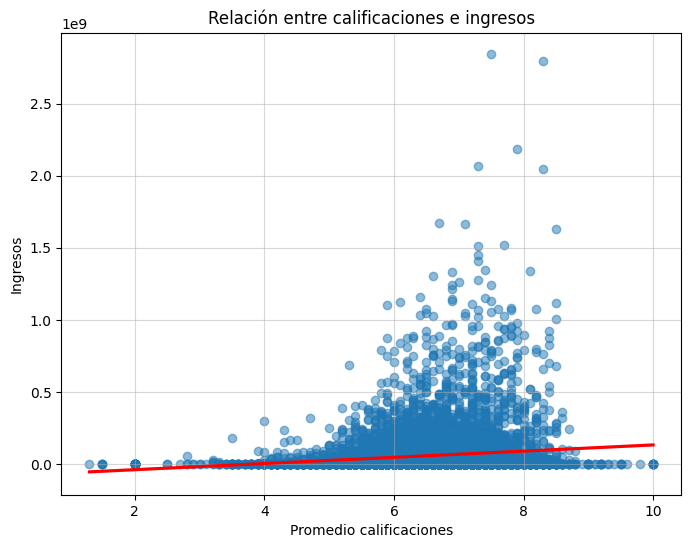

La correlación entre las calificaciones y los ingresos es: 0.14126181161900297


In [11]:
print("14. ¿Cómo se correlacionan las calificaciones con el éxito comercial?")

plt.figure(figsize=(8, 6))
sns.regplot(x=datos['voteAvg'], y=datos['revenue'], scatter_kws={'alpha': 0.5}, line_kws={"color": "red"})
plt.title('Relación entre calificaciones e ingresos')
plt.xlabel('Promedio calificaciones')
plt.ylabel('Ingresos')
plt.grid(alpha=0.5)
plt.show()

# Calcular la correlación entre las calificaciones (voteAvg) y los ingresos (revenue)
correlacion = datos['voteAvg'].corr(datos['revenue'])

print(f"La correlación entre las calificaciones y los ingresos es: {correlacion}")

16. ¿Qué estrategias de marketing, como videos promocionales o páginas oficiales, generan mejores resultados?
                 voteAvg  popularity       revenue
video homePage                                    
False False     6.365944   35.138868  3.142091e+07
      True      6.606258   67.393214  7.775714e+07
True  False     7.513333   39.042000  4.237015e+05
      True      7.691667   60.595333  7.128291e+05


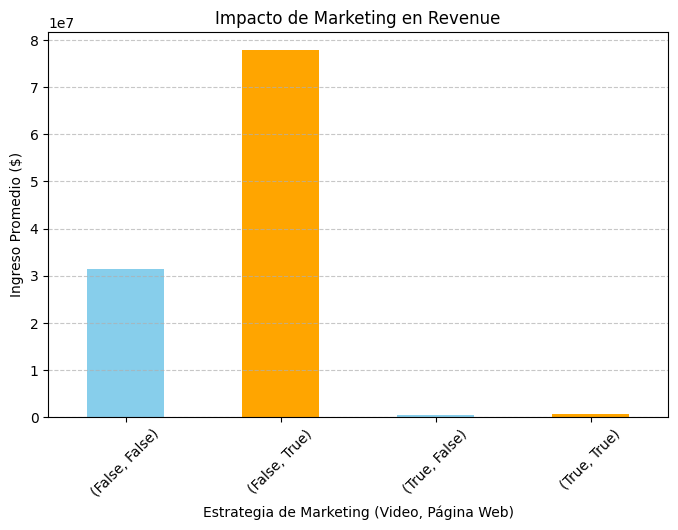

In [91]:
print("16. ¿Qué estrategias de marketing, como videos promocionales o páginas oficiales, generan mejores resultados?")

datos['homePage'] = datos['homePage'].notna()  # Convertir a True si tiene página, False si no

# Calcular métricas promedio
resultados_marketing = datos.groupby(['video', 'homePage'])[['voteAvg', 'popularity', 'revenue']].mean()

# Mostrar resultados
print(resultados_marketing)

# Graficar comparación de revenue entre grupos
plt.figure(figsize=(8, 5))
resultados_marketing['revenue'].plot(kind='bar', color=['skyblue', 'orange'])
plt.xlabel('Estrategia de Marketing (Video, Página Web)')
plt.ylabel('Ingreso Promedio ($)')
plt.title('Impacto de Marketing en Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()